In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-28 / Aki Taanila


## 4/7 Usean kaavion yhdistelmä

### Tuonnit ja alkuvalmistelut

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiikan tyylimäärittely 'whitegrid' sisältää taustaviivoitukset (grid).
# Muita tyylivaihtoehtoja ovat 'darkgrid', 'dark', 'white' ja 'ticks'.
sns.set_style('whitegrid')

### Datan avaaminen

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


### subplots

Kaavio on **Axes**-luokan olio. Kaavio sijaitsee **Figure**-luokan olion (kuvion) sisällä. Saman kuvion sisälle voit sijoittaa useita kaavioita. Voit ajatella, että **Figure** on kehys, jonka sisällä on yksi tai useampia kaavioita.

Seuraavassa luodaan **subplots**-funktiolla kuvio, jonka sisällä on neljä kaaviota. **subplots** palauttaa kuvion (**fig**) ja kokoelman kaavioita listana (**axs**). 

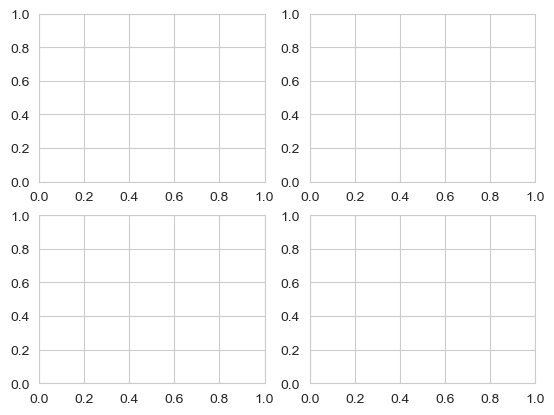

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2)

Seuraavassa lisätään kuvion sisään neljä kaavioita kuten edellä ja määritetään kuvion kooksi **8x5**.

**wspace** ja **hspace** määrittävät kaavioiden välisen tyhjän tilan (w = weigth eli leveys, h = heigth eli korkeus).

Kuhunkin kaavioon lisätään sisältöä. **axs[0, 0]** viittaa ensimmäisen rivin ensimmäiseen kaavioon, **axs[0, 1]** viittaa ensimmäisen rivin toiseen kaavioon jne.

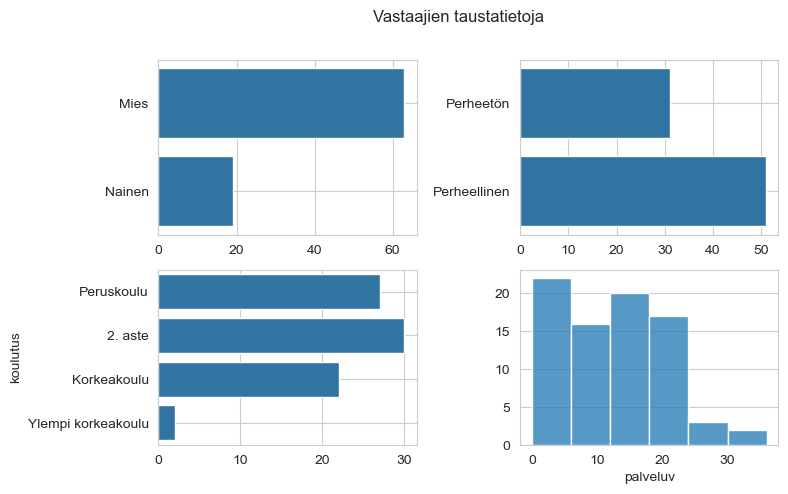

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))
fig.subplots_adjust(wspace=0.4, hspace=0.2)

# Kuvion otsikko.
fig.suptitle('Vastaajien taustatietoja')

# Ensimmäinen kaavio axs[0, 0].
sns.countplot(data=df, y='sukup', ax=axs[0, 0])
axs[0, 0].set_ylabel('')
axs[0, 0].set_yticks([0, 1], ['Mies', 'Nainen'])
axs[0, 0].set_xlabel('')
axs[0, 0].grid(axis='y')

# Toinen kaavio axs[0, 1].
sns.countplot(data=df, y='perhe', ax=axs[0, 1])
axs[0, 1].set_ylabel('')
axs[0, 1].set_yticks([0, 1], ['Perheetön', 'Perheellinen'])
axs[0, 1].set_xlabel('')
axs[0, 1].grid(axis='y')

# Kolmas kaavio axs[1, 0].
sns.countplot(data=df, y='koulutus', ax=axs[1, 0])
axs[1, 0].set_yticks([0, 1, 2, 3], ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu'])
axs[1, 0].set_xlabel('')
axs[1, 0].grid(axis='y')

# Neljäs kaavio axs[1, 1].
sns.histplot(data=df, x='palveluv', bins=6, ax=axs[1, 1])
axs[1, 1].set_ylabel('')
axs[1, 1].grid(axis='x')

Jos teet kaavion suoraan dataframesta, niin **subplots**-lisäparametrilla kustakin dataframen sarakkeesta tehdään oma kaavio.

**sharex** ja **sharey** -lisäparametreilla voit pakottaa kaavioille yhteisen x-akselin ja y-akselin.

In [6]:
# Dataframen laskeminen.
df1 = df['johto'].value_counts(normalize=True).sort_index().to_frame('johtoon')
df1['työtovereihin'] = df['työtov'].value_counts(sort=False, normalize=True)
df1['työympäristöön'] = df['työymp'].value_counts(sort=False, normalize=True)
df1['palkkaan'] = df['palkkat'].value_counts(sort=False, normalize=True)
df1['työtehtäviin'] = df['työteht'].value_counts(sort=False, normalize=True)

df1.index = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
                'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']
df1 = df1*100
df1.style.format('{:.1f} %')

,johtoon,työtovereihin,työympäristöön,palkkaan,työtehtäviin
Erittäin tyytymätön,8.5 %,nan %,11.0 %,40.2 %,6.1 %
Jokseenkin tyytymätön,19.5 %,3.7 %,11.0 %,23.2 %,18.3 %
Ei tyytymätön eikä tyytyväinen,36.6 %,19.8 %,36.6 %,23.2 %,35.4 %
Jokseenkin tyytyväinen,28.0 %,43.2 %,28.0 %,12.2 %,30.5 %
Erittäin tyytyväinen,7.3 %,33.3 %,13.4 %,1.2 %,9.8 %


Text(0.5, 0, 'Prosenttia')

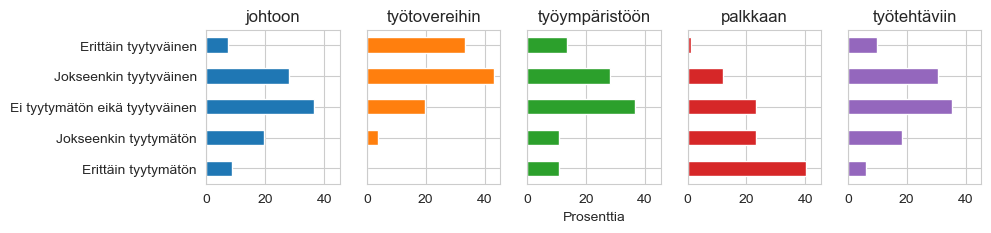

In [7]:
axs = df1.plot(kind='barh', figsize=(10, 2), legend=False, subplots=True, layout=(1, 5), 
                           sharex=True, sharey=True)
axs[0, 2].set_xlabel('Prosenttia')

### Lisätietoa

Seuraavassa osassa 5/7 opit laatimaan **seaborn**-kaavioita:

- [Seaborn-kaaviot](https://github.com/taanila/kaaviot/blob/master/seaborn.ipynb)

Löydät kaikki muistiot osoitteesta https://tilastoapu.wordpress.com/python.